# Lab Activity Week 6

**Homework** Anything you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 - Review: Comparing Indoor vs Outdoor data
- Cut out any data that was part of your outdoor data set that was not taken outdoors or take a new outdoor data set that runs for an extra 30s to give you time to get outside and then cut out that 30s interval
  - Recall we learned methods for slicing dataframes in week 2
- Now produce histogram plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

In [30]:
# our OutsideData.csv is already solely outdoors, so we are good to go!

outdoors = pd.read_csv("OutsideData.csv")
outdoors

,Time,Temperature,Gas,Relative_Humididty,Pressure,Altitude,PM1,PM2.5,PM10
0,1.708129e+09,33.914766,356969,100.000000,698.528280,3029.237108,3,4,4
1,1.708129e+09,26.556758,41200,37.807000,1008.371439,40.696758,3,4,4
2,1.708129e+09,26.581758,54746,37.749602,1008.369829,40.710220,3,4,4
3,1.708129e+09,26.610469,70891,37.668621,1008.381344,40.613969,3,4,4
4,1.708129e+09,26.638203,87236,37.575588,1008.377120,40.649275,3,4,4
...,...,...,...,...,...,...,...,...,...
351,1.708129e+09,17.556953,513185,54.298775,1007.642924,46.787681,5,7,8
352,1.708129e+09,17.557734,513185,54.298875,1007.649440,46.733181,5,7,8
353,1.708129e+09,17.559297,512795,54.299075,1007.648530,46.740793,5,7,8
354,1.708129e+09,17.554219,512795,54.298426,1007.640159,46.810801,5,7,8


This is for PM1!

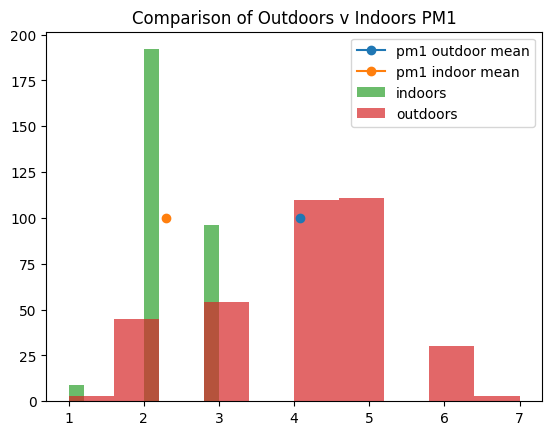

In [45]:
indoors = pd.read_csv("InsideData.csv")
pm1_outdoor_mean = np.mean(outdoors['PM1'])
pm1_indoor_mean = np.mean(indoors['PM1'])
pm1_outdoor_std = np.std(outdoors['PM1'])
pm1_indoor_std = np.std(indoors['PM1'])
plt.plot(pm1_outdoor_mean, 100, label = 'pm1 outdoor mean', marker = 'o')
plt.plot(pm1_indoor_mean, 100, label = 'pm1 indoor mean', marker = 'o')
plt.hist(indoors['PM1'], alpha = 0.7, label = 'indoors')
plt.hist(outdoors['PM1'], alpha = 0.7, label = 'outdoors')
plt.title("Comparison of Outdoors v Indoors PM1")
plt.legend()
plt.show()

In [49]:
pm1_outdoor_mean = np.mean(outdoors['PM1'])
pm1_indoor_mean = np.mean(indoors['PM1'])
pm1_outdoor_std = np.std(outdoors['PM1'])
pm1_indoor_std = np.std(indoors['PM1'])
pm1_outdoor_unc = pm1_indoor_std/len(outdoors['PM1'])
print("The outdoor mean for PM1 is", pm1_outdoor_mean, "and the outdoor std is", pm1_outdoor_std, ". The uncertainty is", pm1_outdoor_unc)
print("The indoor mean for PM1 is", pm1_indoor_mean, "and the indoor std is", pm1_indoor_std)
#uncertainty = sd/sqrt(num stuff)

The outdoor mean for PM1 is 4.075842696629214 and the outdoor std is 1.2050365363371083 . The uncertainty is 0.0014534387101198156
The indoor mean for PM1 is 2.292929292929293 and the indoor std is 0.5174241808026544


This is for PM2.5

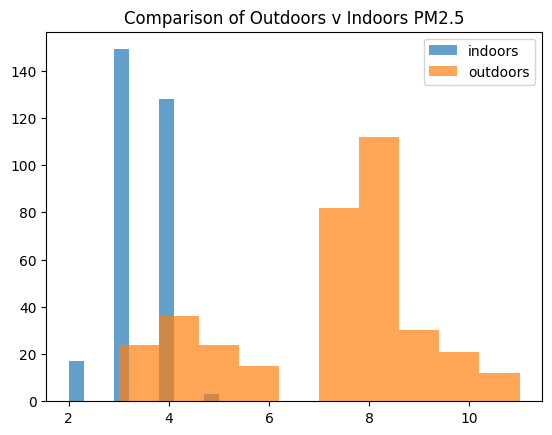

In [32]:
plt.hist(indoors['PM2.5'], alpha = 0.7, label = 'indoors')
plt.hist(outdoors['PM2.5'], alpha = 0.7, label = 'outdoors')
plt.title("Comparison of Outdoors v Indoors PM2.5")
plt.legend()
plt.show()

This is for PM10!

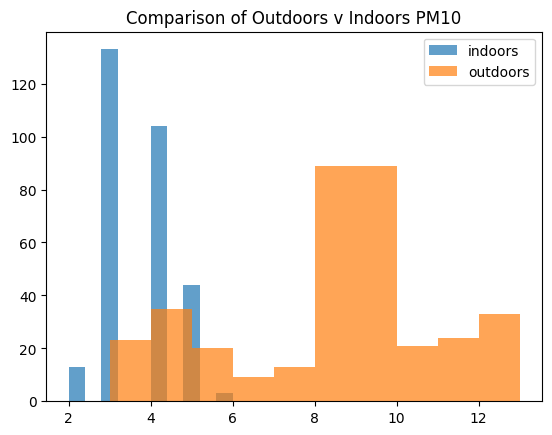

In [33]:
plt.hist(indoors['PM10'], alpha = 0.7, label = 'indoors')
plt.hist(outdoors['PM10'], alpha = 0.7, label = 'outdoors')
plt.legend()
plt.title("Comparison of Outdoors v Indoors PM10")
plt.show()

### Step 2: Comparing sensors
- Get inside/outside data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 1. - Do the same statistical comparison of your outside data with the outside data from the other group.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

### Step 3: More locations
- Consider other areas you could take your sensors where you might find a larger change in the data: for example, is there somewhere near lab where the air quality might be significantly worse?
- Set up your system to be able to run in a way that would allow you to get to that location and take ~5 minutes of data.
  - This might require adding additional input arguments, like a delayed start time, or changing to running indefinitely but making sure that your data is being collected and saved even if your script does not run gracefully.
- Compare this new set of data with your other outdoor data, including the same set of graphs and statistical comparisons made for earlier steps.

### Step 4: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How would you quantify this?
  - HINT: there are linear correlation comparisons you can make mathematically such as the Pearson's correlation or similar (linear $R^2$), is the correlation you are seeing linear? Can you implement these in code?
- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.
  - This will require coming up with a way to ensure that the times match between sensors, what about the way you are collecting data ensures that this is true?
 